# Understanding Hierarchical Clustering
Date: September, 2022.

In [ ]:
import numpy as np
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

GENERATING RANDOM DATASET

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20,centers=4)
# X: The generated samples
# y: The integer labels for cluster membership of each sample
# centers: The number of centers to generate
print(X)
print(y)

[[ -3.46789807  -8.36915142]
 [ -9.92338408  -3.13339215]
 [ -8.98010923  -8.23296665]
 [  8.84286856   1.84089968]
 [ -3.21463048  -7.98694609]
 [ -4.95806994 -10.56427748]
 [ -9.22833154  -3.2607763 ]
 [ -8.2448388   -3.5784074 ]
 [ 10.2895046    1.70835211]
 [ -8.60324105  -4.47463739]
 [ -2.13531667  -8.73471347]
 [ -7.5390171   -8.17003298]
 [ -2.45298429 -11.40147824]
 [  8.29597001   1.42180471]
 [ -7.99736883  -2.37771466]
 [  8.52742811   0.82293387]
 [  8.77515676   0.81303178]
 [ -5.65105819  -7.30706298]
 [ -7.75531127  -6.84964591]
 [ -8.64948908  -7.90260079]]
[3 1 2 0 3 3 1 1 0 1 3 2 3 0 1 0 0 2 2 2]


VISUALIZE THE BLOBS

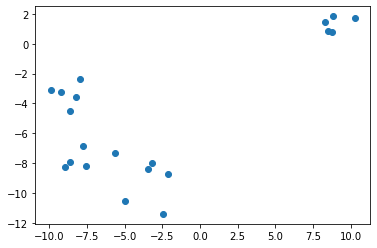

In [ ]:
plt.scatter(X[:,0],X[:,1])

VISUALIZE THE DATASET

In [ ]:
linkage_method = 'average'
#complete
#single
#average
hac = AgglomerativeClustering(n_clusters = 4, linkage = linkage_method)

FIT THE DATA

In [ ]:
hac.fit(X,y)

AgglomerativeClustering(linkage='average', n_clusters=4)

IDENTIFY THE CLUSTERS

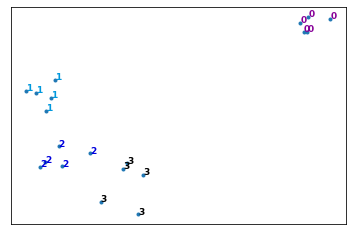

In [ ]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X.
x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

# Get the average distance for X.
X = (X - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X.shape[0]):
    # Replace the data points with their respective cluster value
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X[i, 0], X[i, 1], str(y[i]),
             color=plt.cm.nipy_spectral(hac.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')


# Display the plot of the original data before clustering
plt.scatter(X[:, 0], X[:, 1], marker='.')
# Display the plot
plt.show()

CALCULATE THE DISTANCE MATRIX

In [ ]:
dist_matrix = distance_matrix(X,X)
dist_matrix

array([[0.        , 0.50825667, 0.27290158, 0.98255281, 0.03146479,
        0.18142029, 0.47961312, 0.43212585, 1.02096912, 0.38863818,
        0.07147358, 0.20197253, 0.234427  , 0.94094808, 0.50489729,
        0.91324406, 0.92069212, 0.13453044, 0.24116058, 0.25876055],
       [0.50825667, 0.        , 0.38791239, 1.00154054, 0.49446468,
        0.61255802, 0.03570675, 0.08958523, 1.06474487, 0.12051624,
        0.57216571, 0.39821566, 0.72555238, 0.96477979, 0.11106728,
        0.96047223, 0.97189812, 0.37948814, 0.3004334 , 0.36562029],
       [0.27290158, 0.38791239, 0.        , 1.16456655, 0.28584213,
        0.26568389, 0.37567641, 0.353367  , 1.21343497, 0.28442253,
        0.34074816, 0.07145392, 0.4019043 , 1.12342432, 0.44482521,
        1.10358024, 1.11276619, 0.17892644, 0.12076415, 0.02983173],
       [0.98255281, 1.00154054, 1.16456655, 0.        , 0.95217158,
        1.15919869, 0.97351636, 0.93923151, 0.07226651, 0.98611572,
        0.96580543, 1.10831333, 1.14555955, 0

### **QUESTION 1: What is the structure of this matrix? (explain)**

The structure of this matrix consists on the distance between pairs of cases. We observe which are the most similar objects in the distance matrix. In this case are the objects with a value less than 1, or a distance less than 1.

VISUALIZE AND DISCUSS THE DENDOGRAM

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


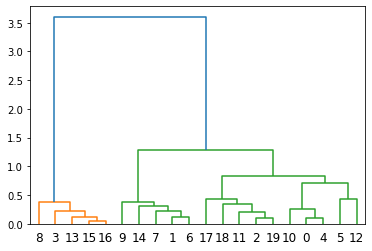

In [ ]:
Z = hierarchy.linkage(dist_matrix, method=linkage_method)
dendro = hierarchy.dendrogram(Z)

### **QUESTION 2: How many clusters can you identify in the dendrogram, is it easy to see?**


The clusters identified in the dendogram are 4 which are easily identifiable since the amount of data we are working with are few, 20 exactly. In the data visualization section you define the number of clusters for the data you are working with.

### **QUESTION 3: Explain the organization of the clusters?**


The clusters have distances not so close to each other. That is to say, they are a little distant with respect to the other methods. They have approximately 5 levels that are easily distinguishable because we are working with few data and the heights of them can be easily evidenced. The groups with the smallest distances correspond to the last 3 from right to left as they have the smallest distances and heights.

### **QUESTION 4: Use the complete, single, and average method, do you see any difference between them? Discuss your answer.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


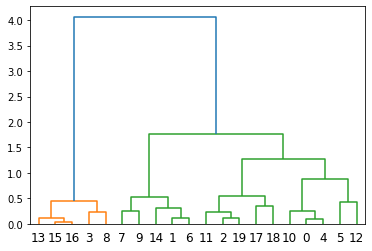

In [ ]:
Z = hierarchy.linkage(dist_matrix, method='complete')
dendro = hierarchy.dendrogram(Z)

For the "complete" dendogram we can see that there are approximately 5 levels with considerable distances between them. The distances are at least visible to the eye. The distances are not as close as in the other methods, in this case the data are farther apart.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


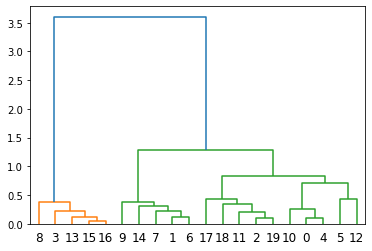

In [ ]:
Z = hierarchy.linkage(dist_matrix, method='average')
dendro = hierarchy.dendrogram(Z)

For the "average" dendogram one can notice 5 levels with considerable distances for the last cluster on the right. For the clusters from right to left without taking into account the last one, smaller and closer distances between them can be denoted.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


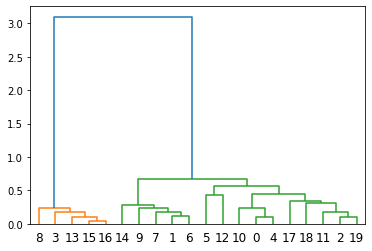

In [ ]:
Z = hierarchy.linkage(dist_matrix, method='single')
dendro = hierarchy.dendrogram(Z)

For the "single" dendogram, approximately 8 levels can be denoted where the last ones are the ones that are closest to each other. Likewise the clusters have close distances between them, almost all of them have approximate close distances between them.